In [158]:
%matplotlib inline
# %matplotlib notebook
import os;
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# For 3d plot
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# very limited information when exception is caught
%xmode Plain
# %pdb on or %ipdb on # enable debugger when exception occurred

Exception reporting mode: Plain


In [2]:
# https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/
def magic(N):
    magic_square = np.zeros((N,N), dtype=int)

    n = 1
    i, j = 0, N//2

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj

    return (magic_square)

In [3]:
path = os.getcwd()+'/data/ex2data1.txt';
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head(5)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
data['Admitted'].head(5)

0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64

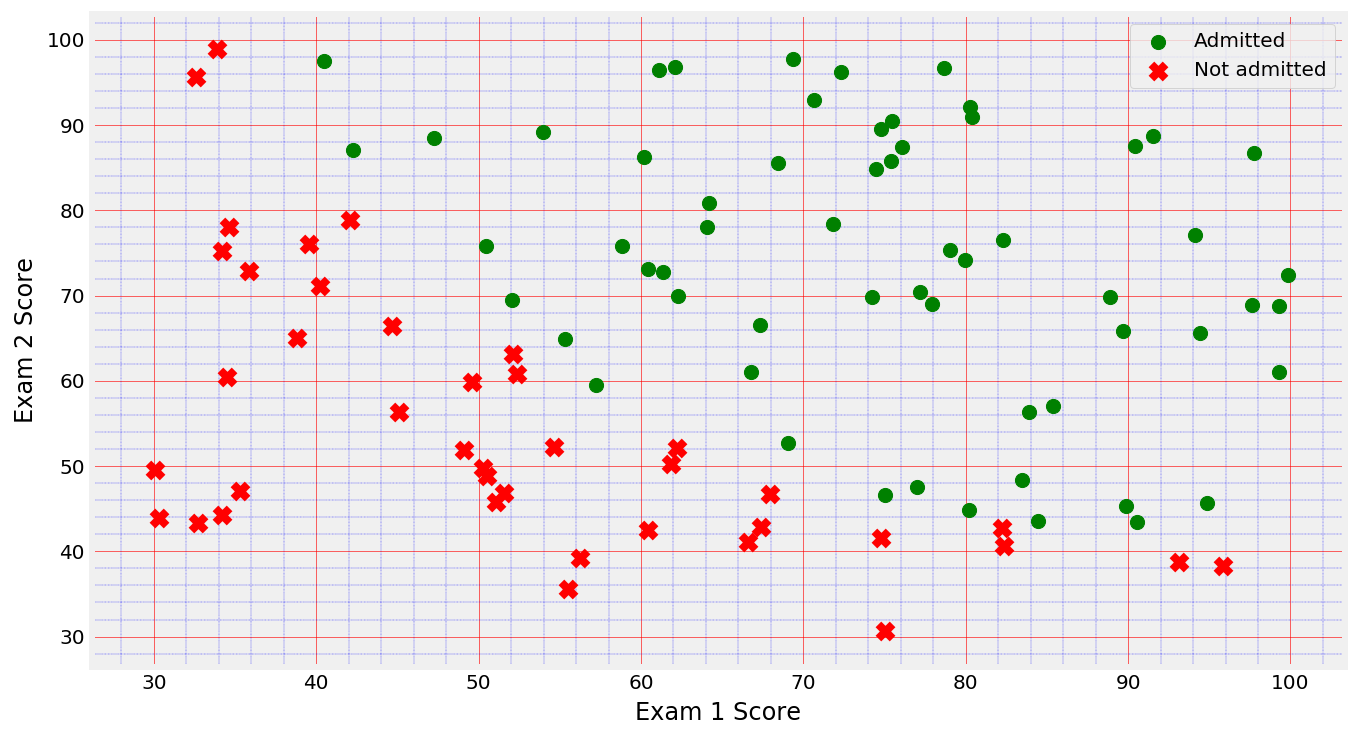

In [4]:
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = pos['Exam 1'], y = pos['Exam 2'], s=50, c = 'g', marker = 'o', label = 'Admitted')
ax.scatter(x = neg['Exam 1'], y = neg['Exam 2'], s=50, c = 'r', marker = 'x', label = 'Not admitted' )
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(loc = 1)
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
sigmoid(0)

0.5

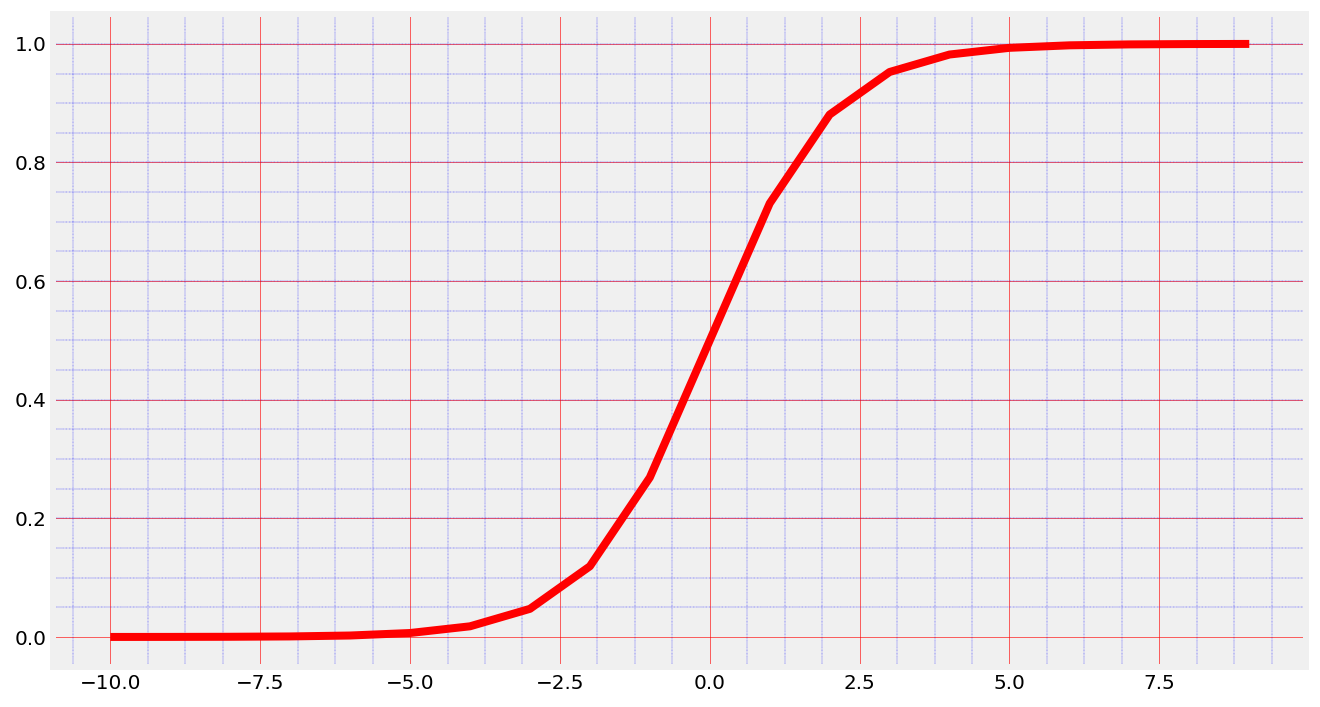

In [14]:
sig = np.arange(-10, 10, 1)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(sig, sigmoid(sig), 'r')
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both')

In [8]:
data.insert(0, 'Ones', 1)
data.head(5)

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
cols = data.shape[1]

In [10]:
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1 : cols]
X = np.array(X.values)
y = np.array(y.values)
X.shape, y.shape

((100, 3), (100, 1))

In [11]:
def costFunction(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    J = np.sum(first - second) / len(X)
    return J

In [12]:
_X = magic(3)
_X = np.insert(_X, 0, 1, axis=1)
_theta = np.array(np.zeros(4))
_y = np.array([1, 0, 1]).T
_X.shape, _y.shape, _theta.shape

((3, 4), (3,), (4,))

In [13]:
_J = costFunction(_theta, _X, _y)
_J

2.0794415416798357

In [14]:
theta = np.zeros(3)
J = costFunction(theta, X, y)
J

0.6931471805599453

In [15]:
def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    iter = theta.shape[1]
    
    grad = np.zeros(iter)
    error = (sigmoid(X * theta.T) - y);
    
    for i in range(iter):
        grad[i] = np.sum(np.multiply(error, X[:, [i]])) / len(X)
        
    return grad   
    

In [16]:
grad = gradient(_theta, _X, _y)
grad

array([-0.5, -2.5, -2.5, -2.5])

In [17]:
grad = gradient(theta, X, y)
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [18]:
result = opt.fmin_tnc(func = costFunction, x0 = theta, fprime = gradient, args = (X, y)) # truncated newton algorithms
result

(array([-25.16131868,   0.20623159,   0.20147149]), 36, 0)

In [23]:
theta = result[0]
costFunction(theta, X, y)

0.2034977015894744

In [20]:
boundary_xs = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
boundary_ys = (-1. / theta[2]) * (theta[0] + theta[1] * boundary_xs) 
boundary_xs, boundary_ys

(array([30.05882245, 99.8278578 ]), array([94.11872757, 22.70128155]))

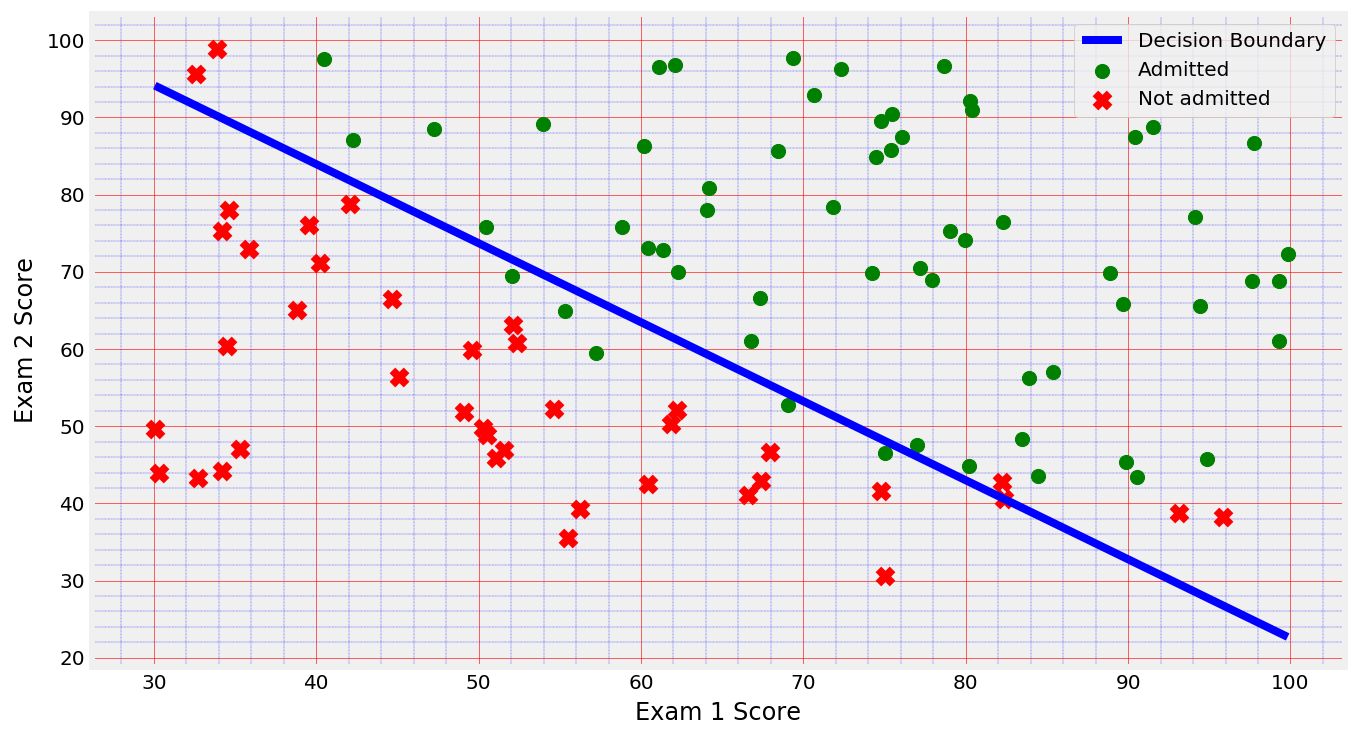

In [36]:
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = pos['Exam 1'], y = pos['Exam 2'], s=50, c = 'g', marker = 'o', label = 'Admitted')
ax.scatter(x = neg['Exam 1'], y = neg['Exam 2'], s=50, c = 'r', marker = 'x', label = 'Not admitted' )
ax.plot(boundary_xs, boundary_ys, 'b', label='Decision Boundary' )
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(loc = 1)
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [184]:
def predict(X, theta):
    prob = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in prob]

In [28]:
theta = np.matrix(result[0])
pre1 = predict(np.matrix([1, 40, 85]), theta)
pre2 = predict(np.matrix([1, 30, 85]), theta)
pre1, pre2

([1], [0])

In [33]:
pre3 = predict(np.asmatrix(X), theta)
accuracy = (np.mean(y == pre3) * 100)
accuracy

52.2

In [36]:
correct = [1 if (a == 1 and b == 1) or (a == 0 and b == 0) else 0 for (a, b) in zip(pre3 , y)]
result = (sum(map(int, correct)) % len(correct))
print('accuracy: {0}%'.format(result))

accuracy: 89%


In [174]:
path = os.getcwd() + "/data/ex2data2.txt"
data2 = pd.read_csv(path, header = None, names = ['MC Test1', 'MC Test2', 'Passed'])
data2.describe()

,MC Test1,MC Test2,Passed
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


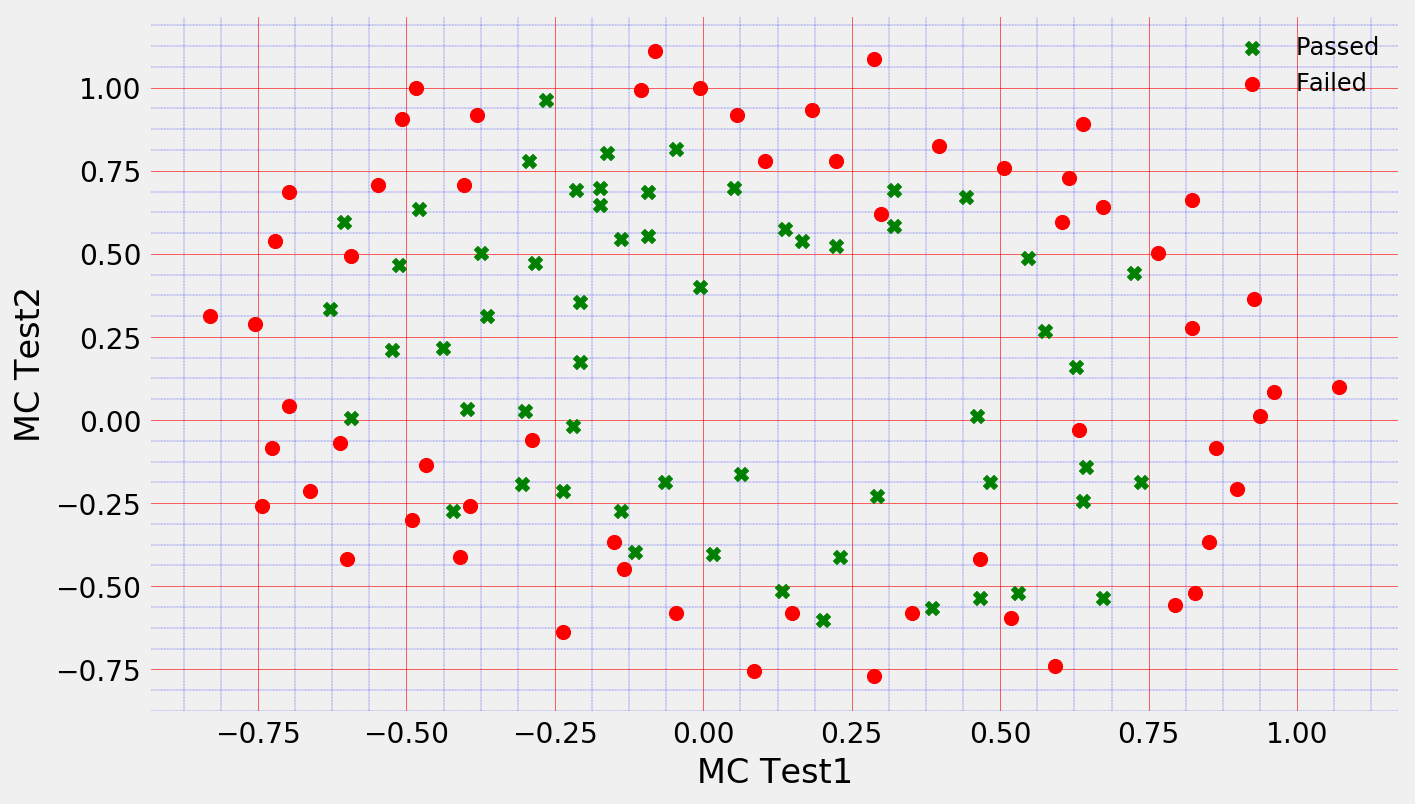

In [175]:
passed = data2[data2['Passed'].isin([1])]
failed = data2[data2['Passed'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = passed['MC Test1'], y = passed['MC Test2'], marker='X', c='g', s=50, label = 'Passed')
ax.scatter(x = failed['MC Test1'], y = failed['MC Test2'], marker='o', c='r', s=50, label = 'Failed')
ax.legend(frameon = False, fontsize =12 ,loc=1)
ax.set_xlabel('MC Test1')
ax.set_ylabel('MC Test2')
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [176]:
data2.insert(0, 'Ones', 1)

In [177]:
def polynomialFeature(X1, X2, degree):
    out = [np.ones(X1.shape[0])]
    
    for i in range(1, degree):
        for j in range(0, i):
            out.append((X1 ** (i - j)) * (X2 ** j))
    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)   

In [178]:
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]
X2 = np.array(X2.values)
y2 = np.array(y2.values)
X2.shape, y2.shape

((118, 3), (118, 1))

In [179]:
X2 = polynomialFeature(X2[:, 1], X2[:, 2], 5)

In [180]:
X2.shape

(118, 11)

In [165]:
def costReg(theta, X, y, _lambda):
    m = len(X)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    error = sigmoid(X * theta.T)
    first = np.multiply(-y, np.log(error))
    second = np.multiply((1-y), np.log(1-error))
    j_wor = (1 / m) * np.sum(first - second) # without regularization
    reg = (_lambda / (2 * m)) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))
    j_wr = j_wor + reg # with regularization
    return j_wr

In [10]:
_X = magic(3)
_X = np.insert(_X, 0, 1, axis=1) 
_y = np.array([1, 0 ,1])
_theta = np.array([-2, -1, 1, 2])
_X.shape, _y.shape, _theta.shape


((3, 4), (3,), (4,))

In [166]:
_J = costReg(_theta, _X, _y, 0)
_J

8.049499649514633

In [167]:
def gradientDescent(theta, X, y, _lambda):
    grad = np.zeros(theta.shape[0])
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    error = sigmoid(X * theta.T)
    theta_size = theta.shape[1]
    m = len(X)
    for j in range(theta_size):
        if j == 0:
            grad[j] = (1 / m) * np.sum(np.multiply((error - y), X[:, [j]]))
        else:
            grad[j] = (1 / m) * np.sum(np.multiply((error - y), X[:, [j]])) + ((_lambda / m) * theta[:, j])
    return grad

In [168]:
grad = gradientDescent(_theta, _X, _y, 0)
grad

array([0.95166224, 4.61694632, 4.94437051, 4.71361684])

In [181]:
theta2 = np.zeros(11)

In [169]:
costReg(theta2, X2, y2, 1)

0.6931471805599454

In [170]:
grad2 = gradientDescent(theta2, X2, y2, 1)
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad2[:5]))

	[0.0085, 0.0188, 0.0503, 0.0115, 0.0184]


In [171]:
_theta2 = np.ones(X2.shape[1])
_grad2 = gradientDescent(_theta2, X2, y2, 10)
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*_grad2[:5]))

	[0.2702, 0.1818, 0.2151, 0.1073, 0.1485]


In [182]:
learningRate = 1
# make sure theta must be first argument in costReg & gradientDescent methods definition, so x0 can be 
# passed as theta to the fmin_tnc
# so no need to pass from args
result2 =  opt.fmin_tnc(func = costReg, x0 = theta2, fprime = gradientDescent, args = (X2, y2, learningRate))
result2

(array([ 0.53010249,  0.29075567, -1.60725763, -0.5821382 ,  0.01781027,
        -0.21329509, -0.40024142, -1.37144138,  0.02264303, -0.9503358 ,
         0.03440849]), 22, 1)

In [190]:
theta_min = np.matrix(result2[0])
prediction = predict(np.asmatrix(X2), theta_min)
correct = [1 if (a == 1 and b == 1) or ((a == 0) and (b == 0)) else 0 for (a, b) in zip(prediction, y2)]
accuracy = sum(map(int, correct)) % len(correct)
print('accuracy {0}%'.format(accuracy))

accuracy 78%


In [196]:
pre1 = predict(np.matrix([1, 40, 85, 60, 80, 20, 40, 30, 100, 40, 25]), theta_min)
pre2 = predict(np.matrix([1, 30, 85, 60, 70, 30, 70, 5, 100, 40, 25]), theta_min)
pre1, pre2

([0], [0])